<a href="https://colab.research.google.com/github/callee2006/MachineLearning/blob/master/ThickPlateQC(incl_preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split

%matplotlib inline
#import torch
#import torch.nn

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# !cp /content/gdrive/My\ Drive/Stratification.csv .

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [0]:
# Set Hangul font

from matplotlib import font_manager, rc
import platform

# Hangul font setting
if platform.system() == 'Windows':
  font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
  rc('font', family=font_name)
else:
  rc('font', family='AppleGothic')
  
matplotlib.rcParams['axes.unicode_minus'] = False            # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처

## Read data file

In [186]:
# check if the data file (csv format) exists
print(os.getcwd())
print('csv file exist ? :', os.path.exists('Stratification.csv'))
!ls Stratification.csv

/content
csv file exist ? : True
Stratification.csv


In [187]:
# read data file
df0 = pd.read_csv('Stratification.csv')
print(df0.head())

  V_수강래들_상태코드      SLAB_NO   UNCOND_NO CHARGE_NO CC_UNCOND_SF_MTH CUR_HCR_TP  \
0          GG  SB47077 061  SB47077 06   SB47077              NaN          C   
1          GG  SB47077 062  SB47077 06   SB47077              NaN          C   
2          GG  SB47077 063  SB47077 06   SB47077              NaN          C   
3          GG  SB47077 561  SB47077 56   SB47077              NaN          C   
4          GG  SB47077 562  SB47077 56   SB47077              NaN          C   

  PRODUCT_CD QA_TRK_ACT_CODE SM_STEEL_GRD SPECIFICATION_CD  \
0          P             NaN  V16110L5XX2        VL-A32-TM   
1          P             NaN  V16110L5XX2        VL-A32-TM   
2          P             NaN  V16110L5XX2        VL-A32-TM   
3          P             NaN  V16110L5XX2       AB/AH32-TM   
4          P             NaN  V16110L5XX2       AB/AH32-TM   

  UNCOND_SLAB_ASS_FLAG CC_CSTP_COOL_TYPE CTL_INDI_HCR_TP DESN_SRF_INDI  \
0                    D                 L               H             P  

In [188]:
feature_list = ['탐상방법', 'CAST_H_ASIS_DEN', 'V_전로_RH온도_Drop', 'V_RH_AL총투입량', 'RH최종Al투입후환류시간', 'V_전로종점온도', 'V_전로_종점온도차__t_', 'V_전로종점산소', 'V_공Ladle_Cycle',  'V_체류_RH_T_D_', 'V_RH출발온도', 'V_RH후환류시간', 'RH_CHARGE_T_VACCUM_PRC_TM', 'V_RH_OB량', 'V_RH처리시간_실적_총진공_', 'C_ST_CONST_CEQ_RST', 'V_이송_전로_정련_',  'V_T_D온도차_평균_목표_',  '파생_전열량장단변비', 'UNCOND_SLAB_DIR_WTH', 'C_ST_CONST_C_RST', 'C_ST_CONST_SI_RST', 'C_ST_CONST_MN_RST', 'C_ST_CONST_P_RST', 'C_ST_CONST_TOT_AL_RST', 'C_ST_CONST_SOL_AL_RST', 'C_ST_CONST_NB_RST', 'C_ST_CONST_CA_RST', 'C_ST_CONST_MO_RST_N', 'C_ST_CONST_TI_RST_N',  'TUNDISH_TAP_WGT', 'CASTING_MIN_SPEED', 'CASTING_AVG_SPEED', 'SHRO_NOZ_SETTLE_DTH_MAX_V', 'SHRO_NOZ_SETTLE_DTH_MI_V', 'SHRO_NOZ_SETTLE_DTH_AV_V', 'SHRO_NOZ_AR_MAX_FLOW_QT',  'TUND_UP_NOZ_AR_MAX_FLOW_QT', 'TUND_UP_NOZ_AR_MAX_OILP', 'TUND_UP_NOZ_AR_MI_FLOW_QT', 'TUND_UP_NOZ_AR_MI_OILP', 'TUND_UP_NOZ_AR_AV_FLOW_QT', 'TUND_UP_NOZ_AR_AV_OILP', 'SETT_NOZ_SETTLE_DTH_MAX_V', 'SETT_NOZ_SETTLE_DTH_MI_V', 'SETT_NOZ_SETTLE_DTH_AV_V', 'MLD_SOT_LEFT_C_WTR_TM_TIM', 'MLD_SOT_RGT_C_WTR_TM_TIM', 'MLD_LON_ISIDE_C_WTR_TM_TIM', 'MLD_LON_OSD_C_WTR_TM_TIM', 'CAST_CAST_SPD_CNG_QT', 'MLD_M_MAT_SUR_VAR_W_MAX_V', 'TUND_NOZ_CLOSE_X', 'TUND_NOZ_AC_POURING_QT', 'TUND_NOZ_CAL_POURING_QT', 'TUNDISH_SLID_NOZ_OPEN_H_VAR_RT', 'TUNDISH_SLID_NOZ_MAX_OPEN_H', 'TUNDISH_SLID_NOZ_MI_OPEN_H', 'TUND_SLIDGTE_OPEN_H_QT',  'MLAC_5MM_OV_TIM', 'MLAC_10MM_OV_TIM', 'MLAC_20MM_OV_TIM', 'EMLA_LS_F_V', 'EMLA_LS_LEFT_ISIDE_E_CUR_V', 'CASTP_LEN_CONT_R', 'SM_CC_MD_MX_CNG_CAST_SPD', 'SM_CC_MD_MXML_VAR_QT',  '파생_Mn_S비', '파생_CaS비', '파생_경화능지수_연구소', '파생_장변전열량', '파생_단변전열량', '파생_용강온도차', 'V_Cast순',  'V_RH_Coolant량',  '출강시간', '제품두께_max', '계절가중치', 'AVG_SM_CC_SR_10SG_R_IL_C_THK_A_', 'MAX_SM_CC_SR_11SG_R_OL_C_THK_A__MIN_SM_CC_SR_11SG_R_OL_C_THK_A_', 'AVG_SM_CC_SR_9SG_R_IL_C_THK_A__AVG_SM_CC_SR_9SG_R_OL_C_THK_A_']
feature_list.append('UT결과_수치형')
df = df0[feature_list]
#df = df0

#df = df.fillna(0)         # fill missing fields with zeroes
print(df.isna().any())

탐상방법                                                               False
CAST_H_ASIS_DEN                                                     True
V_전로_RH온도_Drop                                                      True
V_RH_AL총투입량                                                        False
RH최종Al투입후환류시간                                                       True
V_전로종점온도                                                            True
V_전로_종점온도차__t_                                                      True
V_전로종점산소                                                            True
V_공Ladle_Cycle                                                      True
V_체류_RH_T_D_                                                        True
V_RH출발온도                                                            True
V_RH후환류시간                                                           True
RH_CHARGE_T_VACCUM_PRC_TM                                           True
V_RH_OB량                                           

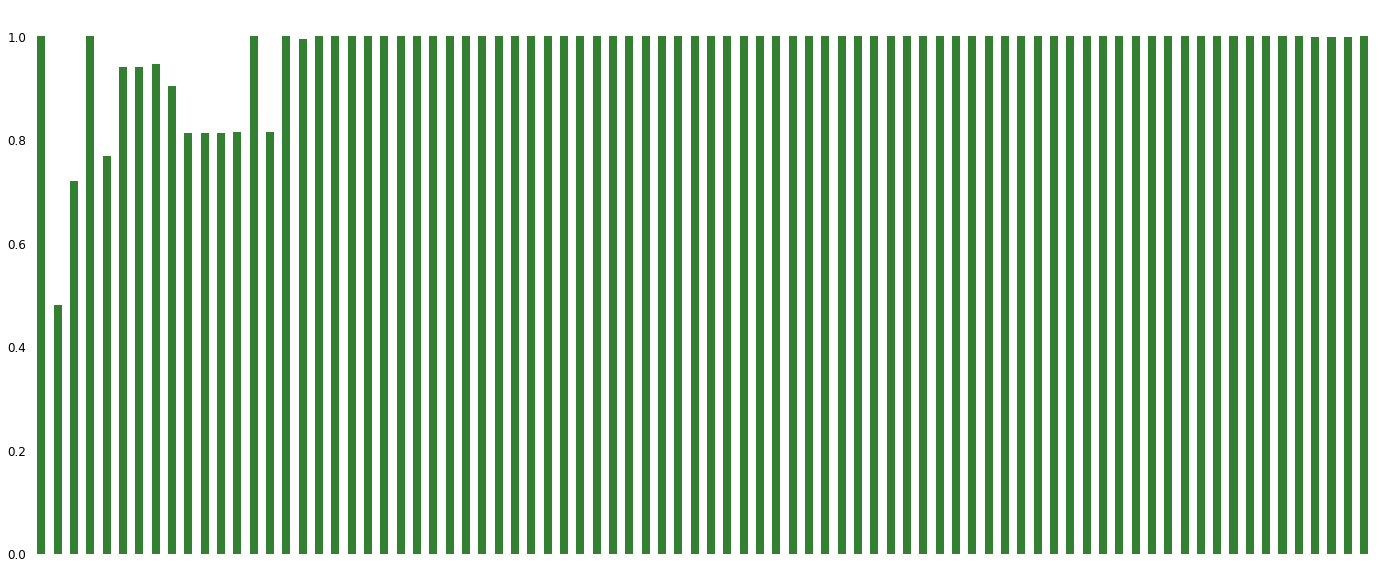

In [189]:
import missingno as msno
# misingno: a package for missing data visuallization (https://github.com/ResidentMario/missingno)

msno.bar(df, color=(0.2, 0.5, 0.2), fontsize=12)
plt.show()

In [190]:
ms_feature_list = df.isnull().any().index.tolist()
print("ms_feature_list = ", ms_feature_list)

ms_feature_list =  ['탐상방법', 'CAST_H_ASIS_DEN', 'V_전로_RH온도_Drop', 'V_RH_AL총투입량', 'RH최종Al투입후환류시간', 'V_전로종점온도', 'V_전로_종점온도차__t_', 'V_전로종점산소', 'V_공Ladle_Cycle', 'V_체류_RH_T_D_', 'V_RH출발온도', 'V_RH후환류시간', 'RH_CHARGE_T_VACCUM_PRC_TM', 'V_RH_OB량', 'V_RH처리시간_실적_총진공_', 'C_ST_CONST_CEQ_RST', 'V_이송_전로_정련_', 'V_T_D온도차_평균_목표_', '파생_전열량장단변비', 'UNCOND_SLAB_DIR_WTH', 'C_ST_CONST_C_RST', 'C_ST_CONST_SI_RST', 'C_ST_CONST_MN_RST', 'C_ST_CONST_P_RST', 'C_ST_CONST_TOT_AL_RST', 'C_ST_CONST_SOL_AL_RST', 'C_ST_CONST_NB_RST', 'C_ST_CONST_CA_RST', 'C_ST_CONST_MO_RST_N', 'C_ST_CONST_TI_RST_N', 'TUNDISH_TAP_WGT', 'CASTING_MIN_SPEED', 'CASTING_AVG_SPEED', 'SHRO_NOZ_SETTLE_DTH_MAX_V', 'SHRO_NOZ_SETTLE_DTH_MI_V', 'SHRO_NOZ_SETTLE_DTH_AV_V', 'SHRO_NOZ_AR_MAX_FLOW_QT', 'TUND_UP_NOZ_AR_MAX_FLOW_QT', 'TUND_UP_NOZ_AR_MAX_OILP', 'TUND_UP_NOZ_AR_MI_FLOW_QT', 'TUND_UP_NOZ_AR_MI_OILP', 'TUND_UP_NOZ_AR_AV_FLOW_QT', 'TUND_UP_NOZ_AR_AV_OILP', 'SETT_NOZ_SETTLE_DTH_MAX_V', 'SETT_NOZ_SETTLE_DTH_MI_V', 'SETT_NOZ_SETTLE_DTH_AV_V', 'ML

In [191]:
# determine features to delete or fill

feature_del_list = []
feature_fill_list = []
feature_list = []

for feature in ms_feature_list:
  ms_ratio = round(sum(df.loc[:, feature].isnull() / df.shape[0] * 100, 2))
  print("{} has [{}%] missing data".format(feature, ms_ratio))
#  print(feature, ' has [', ms_ratio, '%] missing data')
  
  if ms_ratio >= 10.0:
    feature_del_list.append(feature)
  elif ms_ratio > 0.0 and ms_ratio < 10.0:
    feature_fill_list.append(feature) 
  else:
    feature_list.append(feature)
    
print("featuer_del_list ({}) = {}".format(len(feature_del_list), feature_del_list))
print("feature_fill_list ({}) = {}".format(len(feature_fill_list), feature_fill_list))
print("feature_list ({}) = {}".format(len(feature_list), feature_list))

탐상방법 has [2%] missing data
CAST_H_ASIS_DEN has [54%] missing data
V_전로_RH온도_Drop has [30%] missing data
V_RH_AL총투입량 has [2%] missing data
RH최종Al투입후환류시간 has [25%] missing data
V_전로종점온도 has [8%] missing data
V_전로_종점온도차__t_ has [8%] missing data
V_전로종점산소 has [7%] missing data
V_공Ladle_Cycle has [12%] missing data
V_체류_RH_T_D_ has [21%] missing data
V_RH출발온도 has [21%] missing data
V_RH후환류시간 has [21%] missing data
RH_CHARGE_T_VACCUM_PRC_TM has [20%] missing data
V_RH_OB량 has [2%] missing data
V_RH처리시간_실적_총진공_ has [20%] missing data
C_ST_CONST_CEQ_RST has [2%] missing data
V_이송_전로_정련_ has [3%] missing data
V_T_D온도차_평균_목표_ has [2%] missing data
파생_전열량장단변비 has [2%] missing data
UNCOND_SLAB_DIR_WTH has [2%] missing data
C_ST_CONST_C_RST has [2%] missing data
C_ST_CONST_SI_RST has [2%] missing data
C_ST_CONST_MN_RST has [2%] missing data
C_ST_CONST_P_RST has [2%] missing data
C_ST_CONST_TOT_AL_RST has [2%] missing data
C_ST_CONST_SOL_AL_RST has [2%] missing data
C_ST_CONST_NB_RST has [2%] missin

In [0]:
# delete features with too many missing
df = df.drop(feature_del_list, axis = 1)

In [193]:
# fill missing data with mean
for feature in feature_fill_list:
  if df[feature].dtype == 'object':
    print("filling {} with {}".format(feature, df[feature].mode()[0]))
    df[feature] = df[feature].fillna(df[feature].mode()[0])    # fill with first symbol
  else:
    print("filling {} with {}".format(feature, df[feature].mean()))
    df[feature] = df[feature].fillna(df[feature].mean())       # fill with mean

filling 탐상방법 with M033
filling V_RH_AL총투입량 with 74.92400806993948
filling V_전로종점온도 with 1651.410164638511
filling V_전로_종점온도차__t_ with 0.31710808876163205
filling V_전로종점산소 with 534.6470170454545
filling V_RH_OB량 with 36.10221923335575
filling C_ST_CONST_CEQ_RST with 0.3425595158036316
filling V_이송_전로_정련_ with 11.079310344827608
filling V_T_D온도차_평균_목표_ with 3.4351042367182245
filling 파생_전열량장단변비 with 1.1300490847343614
filling UNCOND_SLAB_DIR_WTH with 2112.2797579018156
filling C_ST_CONST_C_RST with 0.1636139878950908
filling C_ST_CONST_SI_RST with 0.29115467383994564
filling C_ST_CONST_MN_RST with 1.0443187626092816
filling C_ST_CONST_P_RST with 0.010926967047747132
filling C_ST_CONST_TOT_AL_RST with 0.03222326832548747
filling C_ST_CONST_SOL_AL_RST with 0.03096704774714181
filling C_ST_CONST_NB_RST with 0.008493611297915198
filling C_ST_CONST_CA_RST with 4.931405514458642
filling C_ST_CONST_MO_RST_N with 0.009577673167451319
filling C_ST_CONST_TI_RST_N with 0.0043363819771351664
filling

In [194]:
print("shape = ", df.shape)
print("total size = ", df.size)

# check statistics
df.describe()

shape =  (1487, 73)
total size =  108551


,V_RH_AL총투입량,V_전로종점온도,V_전로_종점온도차__t_,V_전로종점산소,V_RH_OB량,C_ST_CONST_CEQ_RST,V_이송_전로_정련_,V_T_D온도차_평균_목표_,파생_전열량장단변비,UNCOND_SLAB_DIR_WTH,C_ST_CONST_C_RST,C_ST_CONST_SI_RST,C_ST_CONST_MN_RST,C_ST_CONST_P_RST,C_ST_CONST_TOT_AL_RST,C_ST_CONST_SOL_AL_RST,C_ST_CONST_NB_RST,C_ST_CONST_CA_RST,C_ST_CONST_MO_RST_N,C_ST_CONST_TI_RST_N,TUNDISH_TAP_WGT,CASTING_MIN_SPEED,CASTING_AVG_SPEED,SHRO_NOZ_SETTLE_DTH_MAX_V,SHRO_NOZ_SETTLE_DTH_MI_V,SHRO_NOZ_SETTLE_DTH_AV_V,SHRO_NOZ_AR_MAX_FLOW_QT,TUND_UP_NOZ_AR_MAX_FLOW_QT,TUND_UP_NOZ_AR_MAX_OILP,TUND_UP_NOZ_AR_MI_FLOW_QT,TUND_UP_NOZ_AR_MI_OILP,TUND_UP_NOZ_AR_AV_FLOW_QT,TUND_UP_NOZ_AR_AV_OILP,SETT_NOZ_SETTLE_DTH_MAX_V,SETT_NOZ_SETTLE_DTH_MI_V,SETT_NOZ_SETTLE_DTH_AV_V,MLD_SOT_LEFT_C_WTR_TM_TIM,MLD_SOT_RGT_C_WTR_TM_TIM,MLD_LON_ISIDE_C_WTR_TM_TIM,MLD_LON_OSD_C_WTR_TM_TIM,CAST_CAST_SPD_CNG_QT,MLD_M_MAT_SUR_VAR_W_MAX_V,TUND_NOZ_CLOSE_X,TUND_NOZ_AC_POURING_QT,TUND_NOZ_CAL_POURING_QT,TUNDISH_SLID_NOZ_OPEN_H_VAR_RT,TUNDISH_SLID_NOZ_MAX_OPEN_H,TUNDISH_SLID_NOZ_MI_OPEN_H,TUND_SLIDGTE_OPEN_H_QT,MLAC_5MM_OV_TIM,MLAC_10MM_OV_TIM,MLAC_20MM_OV_TIM,EMLA_LS_F_V,EMLA_LS_LEFT_ISIDE_E_CUR_V,CASTP_LEN_CONT_R,SM_CC_MD_MX_CNG_CAST_SPD,SM_CC_MD_MXML_VAR_QT,파생_Mn_S비,파생_CaS비,파생_경화능지수_연구소,파생_장변전열량,파생_단변전열량,파생_용강온도차,V_Cast순,V_RH_Coolant량,출강시간,제품두께_max,계절가중치,AVG_SM_CC_SR_10SG_R_IL_C_THK_A_,MAX_SM_CC_SR_11SG_R_OL_C_THK_A__MIN_SM_CC_SR_11SG_R_OL_C_THK_A_,AVG_SM_CC_SR_9SG_R_IL_C_THK_A__AVG_SM_CC_SR_9SG_R_OL_C_THK_A_,UT결과_수치형
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.00000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,74.924008,1651.410165,0.317108,534.647017,36.102219,0.342560,11.079310,3.435104,1.130049,2112.279758,0.163614,0.291155,1.044319,0.010927,0.032223,0.030967,0.008494,4.931406,0.009578,0.004336,22820.798252,0.819045,0.834889,334.941493,291.008742,317.060525,148.878951,4.619368,0.374647,2.443174,0.14620,4.191459,0.305716,185.590451,176.490921,180.352387,6.925219,7.359381,5.954270,6.118897,0.017283,1.436449,235.971755,3.798278,4.201486,23.294997,26.715535,22.657700,23.597176,0.312710,0.028917,0.004707,409.712172,275.570276,9.837449,0.023457,4.572293,483.417110,0.297184,1.153687,1.128727,1.274530,2.115669,6.040350,65.535978,5.855884,22.635602,26.283793,310.921061,9.624612,-0.146418,0.014795
std,68.362576,13.567636,9.894345,94.196380,57.264448,0.064166,8.359879,4.350360,0.046183,179.853708,0.060303,0.070644,0.389625,0.002808,0.005222,0.005168,0.009318,5.682078,0.024521,0.004647,9857.737919,0.051143,0.028835,19.371690,36.527031,19.501537,7.990329,0.790489,0.311007,1.029494,0.12792,0.733005,0.186117,13.671240,16.229835,13.498152,0.472319,0.775477,0.721171,0.730097,0.012425,3.054215,85.572928,1.639395,0.399359,41.950651,9.091455,8.324782,8.557293,3.237731,0.377493,0.100360,67.665787,47.760354,0.003463,0.027363,7.986192,457.460884,0.586848,0.551351,0.063383,0.070267,4.485066,1.871292,248.196195,1.562818,12.994093,5.242840,0.673377,1.316489,0.251614,0.120772
min,0.000000,1523.000000,-145.000000,330.000000,0.000000,0.072000,0.900000,-10.000000,0.920758,1600.000000,0.036600,0.023000,0.270000,0.004000,0.009000,0.009000,0.000000,0.000000,0.000000,0.000000,3824.000000,0.400000,0.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,

In [195]:
# check column names and dtypes
#print("columns = ", df.columns)
for column_name in df.columns:    
    # to save memory and computation
    if df[column_name].dtype == 'float64':
        df[column_name] = df[column_name].astype('float32')
    if df[column_name].dtype == 'int64':
        df[column_name] = df[column_name].astype('int32')
        
    print("\t{} ({}) ".format(column_name, df[column_name].dtype))    
        
    
#print("column names = [", end = "")
#for column_name in df.columns:
#    print('\'{}\', '.format(column_name), end="")
#print(']')

	탐상방법 (object) 
	V_RH_AL총투입량 (int32) 
	V_전로종점온도 (float32) 
	V_전로_종점온도차__t_ (float32) 
	V_전로종점산소 (float32) 
	V_RH_OB량 (int32) 
	C_ST_CONST_CEQ_RST (float32) 
	V_이송_전로_정련_ (float32) 
	V_T_D온도차_평균_목표_ (int32) 
	파생_전열량장단변비 (float32) 
	UNCOND_SLAB_DIR_WTH (int32) 
	C_ST_CONST_C_RST (float32) 
	C_ST_CONST_SI_RST (float32) 
	C_ST_CONST_MN_RST (float32) 
	C_ST_CONST_P_RST (float32) 
	C_ST_CONST_TOT_AL_RST (float32) 
	C_ST_CONST_SOL_AL_RST (float32) 
	C_ST_CONST_NB_RST (float32) 
	C_ST_CONST_CA_RST (int32) 
	C_ST_CONST_MO_RST_N (float32) 
	C_ST_CONST_TI_RST_N (float32) 
	TUNDISH_TAP_WGT (int32) 
	CASTING_MIN_SPEED (float32) 
	CASTING_AVG_SPEED (float32) 
	SHRO_NOZ_SETTLE_DTH_MAX_V (int32) 
	SHRO_NOZ_SETTLE_DTH_MI_V (int32) 
	SHRO_NOZ_SETTLE_DTH_AV_V (int32) 
	SHRO_NOZ_AR_MAX_FLOW_QT (int32) 
	TUND_UP_NOZ_AR_MAX_FLOW_QT (int32) 
	TUND_UP_NOZ_AR_MAX_OILP (float32) 
	TUND_UP_NOZ_AR_MI_FLOW_QT (int32) 
	TUND_UP_NOZ_AR_MI_OILP (float32) 
	TUND_UP_NOZ_AR_AV_FLOW_QT (float32) 
	TUND_UP_NOZ_AR_AV_OILP 

## Convert categorical data into onehot vectors

In [196]:
# make dictionary of values to convert categorical data into one-hot vectors
value_dics = dict()

for column_name in df.columns:    
    if(df[column_name].dtype == object):
#        print("column_name: ", column_name)
        cur_column = df[column_name]
        value_count = cur_column.value_counts()
        value_dics[column_name] = value_count

print(" # of non-numeric columns = ", len(value_dics))
print(value_dics)

 # of non-numeric columns =  1
{'탐상방법': M033    854
A022    436
A011     74
A033     74
N034     23
N022     18
N023      3
B022      3
N045      1
A044      1
Name: 탐상방법, dtype: int64}


In [0]:
# function to convert categorical data to one-hot vector

def onehot_coding(column, column_name, values):
#    print("column_name = ", column_name)
    onehot = pd.Series()
    for value in values.keys():
#        print("value = ", value)
        new_col = (column == value).astype(float32)
        new_name = column_name + '_' + str(value)
        new_col = new_col.rename(new_name)

        if onehot.size == 0:
            onehot = new_col
        else:
            onehot = pd.concat([onehot, new_col], axis = 1)
      
#    print(onehot)
    return onehot    

In [174]:
# extract numeric columns in X_columns

#X_columns = df.columns      # using all columns
X_columns = ['탐상방법', 'CAST_H_ASIS_DEN', 'V_전로_RH온도_Drop', 'V_RH_AL총투입량', 'RH최종Al투입후환류시간', 'V_전로종점온도', 'V_전로_종점온도차__t_', 'V_전로종점산소', 'V_공Ladle_Cycle',  'V_체류_RH_T_D_', 'V_RH출발온도', 'V_RH후환류시간', 'RH_CHARGE_T_VACCUM_PRC_TM', 'V_RH_OB량', 'V_RH처리시간_실적_총진공_', 'C_ST_CONST_CEQ_RST', 'V_이송_전로_정련_',  'V_T_D온도차_평균_목표_',  '파생_전열량장단변비', 'UNCOND_SLAB_DIR_WTH', 'C_ST_CONST_C_RST', 'C_ST_CONST_SI_RST', 'C_ST_CONST_MN_RST', 'C_ST_CONST_P_RST', 'C_ST_CONST_TOT_AL_RST', 'C_ST_CONST_SOL_AL_RST', 'C_ST_CONST_NB_RST', 'C_ST_CONST_CA_RST', 'C_ST_CONST_MO_RST_N', 'C_ST_CONST_TI_RST_N',  'TUNDISH_TAP_WGT', 'CASTING_MIN_SPEED', 'CASTING_AVG_SPEED', 'SHRO_NOZ_SETTLE_DTH_MAX_V', 'SHRO_NOZ_SETTLE_DTH_MI_V', 'SHRO_NOZ_SETTLE_DTH_AV_V', 'SHRO_NOZ_AR_MAX_FLOW_QT',  'TUND_UP_NOZ_AR_MAX_FLOW_QT', 'TUND_UP_NOZ_AR_MAX_OILP', 'TUND_UP_NOZ_AR_MI_FLOW_QT', 'TUND_UP_NOZ_AR_MI_OILP', 'TUND_UP_NOZ_AR_AV_FLOW_QT', 'TUND_UP_NOZ_AR_AV_OILP', 'SETT_NOZ_SETTLE_DTH_MAX_V', 'SETT_NOZ_SETTLE_DTH_MI_V', 'SETT_NOZ_SETTLE_DTH_AV_V', 'MLD_SOT_LEFT_C_WTR_TM_TIM', 'MLD_SOT_RGT_C_WTR_TM_TIM', 'MLD_LON_ISIDE_C_WTR_TM_TIM', 'MLD_LON_OSD_C_WTR_TM_TIM', 'CAST_CAST_SPD_CNG_QT', 'MLD_M_MAT_SUR_VAR_W_MAX_V', 'TUND_NOZ_CLOSE_X', 'TUND_NOZ_AC_POURING_QT', 'TUND_NOZ_CAL_POURING_QT', 'TUNDISH_SLID_NOZ_OPEN_H_VAR_RT', 'TUNDISH_SLID_NOZ_MAX_OPEN_H', 'TUNDISH_SLID_NOZ_MI_OPEN_H', 'TUND_SLIDGTE_OPEN_H_QT',  'MLAC_5MM_OV_TIM', 'MLAC_10MM_OV_TIM', 'MLAC_20MM_OV_TIM', 'EMLA_LS_F_V', 'EMLA_LS_LEFT_ISIDE_E_CUR_V', 'CASTP_LEN_CONT_R', 'SM_CC_MD_MX_CNG_CAST_SPD', 'SM_CC_MD_MXML_VAR_QT',  '파생_Mn_S비', '파생_CaS비', '파생_경화능지수_연구소', '파생_장변전열량', '파생_단변전열량', '파생_용강온도차', 'V_Cast순',  'V_RH_Coolant량',  '출강시간', '제품두께_max', '계절가중치', 'AVG_SM_CC_SR_10SG_R_IL_C_THK_A_', 'MAX_SM_CC_SR_11SG_R_OL_C_THK_A__MIN_SM_CC_SR_11SG_R_OL_C_THK_A_', 'AVG_SM_CC_SR_9SG_R_IL_C_THK_A__AVG_SM_CC_SR_9SG_R_OL_C_THK_A_']

#print("# of input columns = ", len(X_columns))
#print(X_columns)

df2 = pd.DataFrame()

for column_name in df.columns:    
    if column_name in X_columns:
        if df[column_name].dtype == object:
            print("dtype of {} = {}. converting to onehot vectors".format(column_name, df[column_name].dtype))
#            print("name = ", column_name)
#            newcolumns = onehot_coding(df[column_name], column_name, value_dics[column_name])
            onehot = pd.get_dummies(df[column_name]).astype('float32')
#            print(onehot)
            df2 = pd.concat([df2, onehot], axis = 1)
        elif df[column_name].std() != 0:
            df2 = pd.concat([df2, df[column_name]], axis = 1)
        else:
            print("column {} is not used!".format(column_name))


#print("numeric_columns ({}) =".format(len(numeric_columns)), numeric_columns)
print(df2.shape)

dtype of 탐상방법 = object. converting to onehot vectors
(1487, 81)


In [175]:
df2.describe()

,A011,A022,A033,A044,B022,M033,N022,N023,N034,N045,V_RH_AL총투입량,V_전로종점온도,V_전로_종점온도차__t_,V_전로종점산소,V_RH_OB량,C_ST_CONST_CEQ_RST,V_이송_전로_정련_,V_T_D온도차_평균_목표_,파생_전열량장단변비,UNCOND_SLAB_DIR_WTH,C_ST_CONST_C_RST,C_ST_CONST_SI_RST,C_ST_CONST_MN_RST,C_ST_CONST_P_RST,C_ST_CONST_TOT_AL_RST,C_ST_CONST_SOL_AL_RST,C_ST_CONST_NB_RST,C_ST_CONST_CA_RST,C_ST_CONST_MO_RST_N,C_ST_CONST_TI_RST_N,TUNDISH_TAP_WGT,CASTING_MIN_SPEED,CASTING_AVG_SPEED,SHRO_NOZ_SETTLE_DTH_MAX_V,SHRO_NOZ_SETTLE_DTH_MI_V,SHRO_NOZ_SETTLE_DTH_AV_V,SHRO_NOZ_AR_MAX_FLOW_QT,TUND_UP_NOZ_AR_MAX_FLOW_QT,TUND_UP_NOZ_AR_MAX_OILP,TUND_UP_NOZ_AR_MI_FLOW_QT,TUND_UP_NOZ_AR_MI_OILP,TUND_UP_NOZ_AR_AV_FLOW_QT,TUND_UP_NOZ_AR_AV_OILP,SETT_NOZ_SETTLE_DTH_MAX_V,SETT_NOZ_SETTLE_DTH_MI_V,SETT_NOZ_SETTLE_DTH_AV_V,MLD_SOT_LEFT_C_WTR_TM_TIM,MLD_SOT_RGT_C_WTR_TM_TIM,MLD_LON_ISIDE_C_WTR_TM_TIM,MLD_LON_OSD_C_WTR_TM_TIM,CAST_CAST_SPD_CNG_QT,MLD_M_MAT_SUR_VAR_W_MAX_V,TUND_NOZ_CLOSE_X,TUND_NOZ_AC_POURING_QT,TUND_NOZ_CAL_POURING_QT,TUNDISH_SLID_NOZ_OPEN_H_VAR_RT,TUNDISH_SLID_NOZ_MAX_OPEN_H,TUNDISH_SLID_NOZ_MI_OPEN_H,TUND_SLIDGTE_OPEN_H_QT,MLAC_5MM_OV_TIM,MLAC_10MM_OV_TIM,MLAC_20MM_OV_TIM,EMLA_LS_F_V,EMLA_LS_LEFT_ISIDE_E_CUR_V,CASTP_LEN_CONT_R,SM_CC_MD_MX_CNG_CAST_SPD,SM_CC_MD_MXML_VAR_QT,파생_Mn_S비,파생_CaS비,파생_경화능지수_연구소,파생_장변전열량,파생_단변전열량,파생_용강온도차,V_Cast순,V_RH_Coolant량,출강시간,제품두께_max,계절가중치,AVG_SM_CC_SR_10SG_R_IL_C_THK_A_,MAX_SM_CC_SR_11SG_R_OL_C_THK_A__MIN_SM_CC_SR_11SG_R_OL_C_THK_A_,AVG_SM_CC_SR_9SG_R_IL_C_THK_A__AVG_SM_CC_SR_9SG_R_OL_C_THK_A_
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,0.049765,0.293208,0.049765,0.000672,0.002017,0.574311,0.012105,0.002017,0.015467,0.000672,74.924008,1651.410034,0.317107,534.646545,36.102219,0.342559,11.079324,3.435104,1.130051,2112.279758,0.163614,0.291155,1.044318,0.010927,0.032223,0.030967,0.008494,4.931406,0.009578,0.004336,22820.798252,0.819046,0.834884,334.941493,291.008742,317.060525,148.878951,4.619368,0.374647,2.443174,0.146202,4.191461,0.305717,185.590451,176.490921,180.352387,6.925224,7.359375,5.954273,6.118892,0.017283,1.436449,235.971755,3.798280,4.201488,23.294991,26.715535,22.657700,23.597176,0.312710,0.028917,0.004707,409.712172,275.570276,9.837381,0.023457,4.572293,483.417114,0.297184,1.153688,1.128727,1.274529,2.115669,6.040350,65.535978,5.855885,22.635603,26.283793,310.921356,9.624634,-0.146418
std,0.217530,0.455384,0.217531,0.025933,0.044886,0.494615,0.109392,0.044886,0.123443,0.025933,68.362576,13.567619,9.894347,94.196388,57.264448,0.064166,8.359878,4.350360,0.046183,179.853708,0.060303,0.070644,0.389625,0.002808,0.005222,0.005168,0.009318,5.682078,0.024521,0.004647,9857.737919,0.051144,0.028835,19.371690,36.527031,19.501537,7.990329,0.790489,0.311007,1.029494,0.127919,0.733005,0.186118,13.671240,16.229835,13.498152,0.472319,0.775476,0.721171,0.730097,0.012425,3.054215,85.572928,1.639396,0.399358,41.950661,9.091455,8.324782,8.557293,3.237731,0.377493,0.100360,67.665787,47.760354,0.003464,0.027363,7.986192,457.461212,0.586847,0.551351,0.063383,0.070267,4.485066,1.871292,248.196195,1.562821,12.994100,5.242840,0.673377,1.316488,0.251614
mi

## Data normalization

In [176]:
# normalization
# apply one of the following normalization

#df2_normalized = (df2 - df2.mean()) / df2.std()   # standardization
df2_normalized = (df2 - df2.min()) / (df2.max() - df2.min())   # min-max normalization

# check if df2_norm contains nan
if df2_normalized.isnull().any().any():
    print("Warning!!! df2_norm has null value!")
    
df2_normalized.describe()

,A011,A022,A033,A044,B022,M033,N022,N023,N034,N045,V_RH_AL총투입량,V_전로종점온도,V_전로_종점온도차__t_,V_전로종점산소,V_RH_OB량,C_ST_CONST_CEQ_RST,V_이송_전로_정련_,V_T_D온도차_평균_목표_,파생_전열량장단변비,UNCOND_SLAB_DIR_WTH,C_ST_CONST_C_RST,C_ST_CONST_SI_RST,C_ST_CONST_MN_RST,C_ST_CONST_P_RST,C_ST_CONST_TOT_AL_RST,C_ST_CONST_SOL_AL_RST,C_ST_CONST_NB_RST,C_ST_CONST_CA_RST,C_ST_CONST_MO_RST_N,C_ST_CONST_TI_RST_N,TUNDISH_TAP_WGT,CASTING_MIN_SPEED,CASTING_AVG_SPEED,SHRO_NOZ_SETTLE_DTH_MAX_V,SHRO_NOZ_SETTLE_DTH_MI_V,SHRO_NOZ_SETTLE_DTH_AV_V,SHRO_NOZ_AR_MAX_FLOW_QT,TUND_UP_NOZ_AR_MAX_FLOW_QT,TUND_UP_NOZ_AR_MAX_OILP,TUND_UP_NOZ_AR_MI_FLOW_QT,TUND_UP_NOZ_AR_MI_OILP,TUND_UP_NOZ_AR_AV_FLOW_QT,TUND_UP_NOZ_AR_AV_OILP,SETT_NOZ_SETTLE_DTH_MAX_V,SETT_NOZ_SETTLE_DTH_MI_V,SETT_NOZ_SETTLE_DTH_AV_V,MLD_SOT_LEFT_C_WTR_TM_TIM,MLD_SOT_RGT_C_WTR_TM_TIM,MLD_LON_ISIDE_C_WTR_TM_TIM,MLD_LON_OSD_C_WTR_TM_TIM,CAST_CAST_SPD_CNG_QT,MLD_M_MAT_SUR_VAR_W_MAX_V,TUND_NOZ_CLOSE_X,TUND_NOZ_AC_POURING_QT,TUND_NOZ_CAL_POURING_QT,TUNDISH_SLID_NOZ_OPEN_H_VAR_RT,TUNDISH_SLID_NOZ_MAX_OPEN_H,TUNDISH_SLID_NOZ_MI_OPEN_H,TUND_SLIDGTE_OPEN_H_QT,MLAC_5MM_OV_TIM,MLAC_10MM_OV_TIM,MLAC_20MM_OV_TIM,EMLA_LS_F_V,EMLA_LS_LEFT_ISIDE_E_CUR_V,CASTP_LEN_CONT_R,SM_CC_MD_MX_CNG_CAST_SPD,SM_CC_MD_MXML_VAR_QT,파생_Mn_S비,파생_CaS비,파생_경화능지수_연구소,파생_장변전열량,파생_단변전열량,파생_용강온도차,V_Cast순,V_RH_Coolant량,출강시간,제품두께_max,계절가중치,AVG_SM_CC_SR_10SG_R_IL_C_THK_A_,MAX_SM_CC_SR_11SG_R_OL_C_THK_A__MIN_SM_CC_SR_11SG_R_OL_C_THK_A_,AVG_SM_CC_SR_9SG_R_IL_C_THK_A__AVG_SM_CC_SR_9SG_R_OL_C_THK_A_
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,0.049765,0.293208,0.049765,0.000672,0.002017,0.574311,0.012105,0.002017,0.015467,0.000672,0.140835,0.773555,0.854804,0.333302,0.072204,0.464879,0.176418,0.537404,0.587508,0.853800,0.242347,0.572980,0.454946,0.407468,0.645092,0.646090,0.193037,0.170048,0.047414,0.238263,0.319360,0.838091,0.739558,0.847953,0.836232,0.875858,0.992526,0.923874,0.120853,0.488635,0.112460,0.838292,0.229863,0.832244,0.869413,0.888435,0.864612,0.809229,0.847459,0.805478,0.192037,0.022099,0.445230,0.263952,0.707751,0.023295,0.371049,0.492559,0.445230,0.003436,0.003213,0.001569,0.829377,0.909473,0.551763,0.101986,0.034639,0.162705,0.061913,0.208985,0.808763,0.873369,0.539845,0.420029,0.026037,0.346800,0.097196,0.418920,0.404352,0.795421,0.489111
std,0.217530,0.455384,0.217531,0.025933,0.044886,0.494615,0.109392,0.044886,0.123443,0.025933,0.128501,0.081733,0.058202,0.153414,0.114529,0.110251,0.144885,0.174014,0.129643,0.299756,0.115060,0.150948,0.228922,0.165187,0.145069,0.151994,0.211763,0.195934,0.121394,0.255334,0.165721,0.102287,0.115340,0.049042,0.104963,0.053872,0.053269,0.158098,0.100325,0.205899,0.098399,0.146601,0.139938,0.061306,0.079950,0.066493,0.065600,0.090172,0.116318,0.102831,0.138060,0.046988,0.161458,0.113926,0.229516,0.041951,0.126270,0.180974,0.161458,0.035579,0.041944,0.033453,0.136975,0.157625,0.123672,0.118969,0.060501,0.164774,0.122260,0.116104,0.049694,0.052140,0.160181,0.155941,0.098608,0.171738,0.099955,0.349523,0.088741,0.108801,0.104316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

## Make balance between normal and abnormal samples

In [0]:
# merge X and y
y_name = 'UT결과_수치형'

data = pd.concat([df2_normalized, df[y_name]], axis = 1)

In [178]:
# separate normal and abnormal samples
normal = data.loc[data[y_name] == 0]
abnormal = data.loc[data[y_name] == 1]
#print("normal samples: ", normal.shape)
#print("abnormal samples: ", abnormal.shape)

# convert DataFrame or Series to numpy arrays
X_normal_numpy = normal.drop(y_name, axis = 1).values
y_normal_numpy = normal[y_name].values
X_abnormal_numpy = abnormal.drop(y_name, axis = 1).values
y_abnormal_numpy = abnormal[y_name].values

#print("X_normal_numpy.shape = ", X_normal_numpy.shape)
#print("y_normal_numpy.shape = ", y_normal_numpy.shape)
#print("X_abnormal_numpy.shape = ", X_abnormal_numpy.shape)
#print("y_abnormal_numpy.shape = ", y_abnormal_numpy.shape)

# split training / test samples
X_normal_train, X_normal_test, y_normal_train, y_normal_test = train_test_split(X_normal_numpy, y_normal_numpy, random_state = 20)
X_abnormal_train, X_abnormal_test, y_abnormal_train, y_abnormal_test = train_test_split(X_abnormal_numpy, y_abnormal_numpy, random_state = 0)

# for test
#X_abnormal_train= X_abnormal_numpy
#y_abnormal_train= y_abnormal_numpy

print("X_normal_train = ", X_normal_train.shape)
print("y_normal_train = ", y_normal_train.shape)
print("X_abnormal_train = ", X_abnormal_train.shape)
print("y_abnormal_train = ", y_abnormal_train.shape)


print("X_normal_test = ", X_normal_test.shape)
print("y_normal_test = ", y_normal_test.shape)
print("X_abnormal_test = ", X_abnormal_test.shape)
print("y_abnormal_test = ", y_abnormal_test.shape)


# compute ratio of (normal / abnormal) samples
abnormal_ratio = 1.
if X_abnormal_train.shape[0] != 0:
    abnormal_ratio = int(X_normal_train.shape[0] / X_abnormal_train.shape[0])
if abnormal_ratio < 1:
    abnormal_ratio = 1
    
print("abnormal_ratio =", abnormal_ratio)    


# maximum # of copies of abnormal samples
max_copy = 10

if abnormal_ratio > max_copy:
    # randomly choose normal samples
    sampling_count = int(X_abnormal_train.shape[0] * max_copy)
    print("choosing {} samples from normal data = ".format(sampling_count))
    sample_idx = np.random.choice(X_normal_train.shape[0], sampling_count, replace = False)
    X_train = X_normal_train[sample_idx]
    y_train = y_normal_train[sample_idx]
    abnormal_ratio = max_copy
    print("now, abnormal_ratio =", abnormal_ratio)
else:
    # put all normal samples
    X_train = X_normal_train
    y_train = y_normal_train

# make balance by copying abnormal samples
# append abnormal samples
for i in range(abnormal_ratio):
    X_train = np.concatenate([X_train, X_abnormal_train], axis = 0)
    y_train = np.concatenate([y_train, y_abnormal_train], axis = 0)

print("# of normal training samples = ", len(y_train[y_train == 0]))    
print("# of abnormal training samples = ", len(y_train[y_train == 1]))

X_normal_train =  (1098, 81)
y_normal_train =  (1098,)
X_abnormal_train =  (16, 81)
y_abnormal_train =  (16,)
X_normal_test =  (367, 81)
y_normal_test =  (367,)
X_abnormal_test =  (6, 81)
y_abnormal_test =  (6,)
abnormal_ratio = 68
choosing 160 samples from normal data = 
now, abnormal_ratio = 10
# of normal training samples =  160
# of abnormal training samples =  160


In [0]:
# this is code is when data is balanced

#X = df2_normalized.values
#y = df[y_name]
##print(y)
#print(type(y), y.shape)

#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

In [180]:
# neural network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = [50, 50], alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
#mlp = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 0.001, max_iter = 100000).fit(X_train, y_train)

print("Training accuracy = ", mlp.score(X_train, y_train))
print("Test Accuracy for normal samples = ", mlp.score(X_normal_test, y_normal_test))
print("Test Accuracy for abnormal samples = ", mlp.score(X_abnormal_test, y_abnormal_test))

Training accuracy =  1.0
Test Accuracy for normal samples =  0.8910081743869209
Test Accuracy for abnormal samples =  0.16666666666666666


In [181]:
# logistic regression (for comparison)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver ='liblinear').fit(X_train,y_train)

print("Training accuracy = ", lr.score(X_train, y_train))
print("Test Accuracy for normal samples = ", lr.score(X_normal_test, y_normal_test))
print("Test Accuracy for abnormal samples = ", lr.score(X_abnormal_test, y_abnormal_test))
# print("coef_ =", lr.coef_)

Training accuracy =  0.865625
Test Accuracy for normal samples =  0.7438692098092643
Test Accuracy for abnormal samples =  0.16666666666666666


In [182]:
# logistic regression (for comparison)

from sklearn.svm import SVC

svc = SVC(gamma='auto', C=0.01).fit(X_train,y_train)

print("Training accuracy = ", svc.score(X_train, y_train))
print("Test Accuracy for normal samples = ", svc.score(X_normal_test, y_normal_test))
print("Test Accuracy for abnormal samples = ", svc.score(X_abnormal_test, y_abnormal_test))
# print("coef_ =", lr.coef_)

Training accuracy =  0.725
Test Accuracy for normal samples =  0.670299727520436
Test Accuracy for abnormal samples =  0.3333333333333333


In [0]:
from sklearn.decomposition import PCA

X_all = data.drop(y_name, axis = 1).values
y_all = normal[y_name].values
pca = PCA(n_components=2).fit(X_all)
X_normal_pca = pca.transform(X_normal_numpy)
X_abnormal_pca = pca.transform(X_abnormal_numpy)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


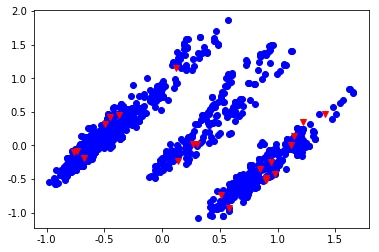

In [184]:
import matplotlib.pyplot as plt
plt.plot(X_normal_pca[:,0], X_normal_pca[:,1], 'bo')
plt.plot(X_abnormal_pca[:,0], X_abnormal_pca[:,1], 'rv')